In [1]:
import numpy as np
#import missingno as msno
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import h5py
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import StandardScaler
from joblib import Parallel, delayed
import psutil  # To monitor memory usage
import os
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<span style="border-bottom: 3px solid black; font-size: 22px; font-weight: bold;">Data Visualization</span>  
<br> It helps in understanding patterns, trends, and insights from data. We used libraries like `matplotlib.pyplot`, `seaborn`, `mpl_toolkits.mplot3d.Axes3D`. We used various methods like,
<br> 1. Histogram : Used to analyze distributions of numerical data.
<br> 2. Scatter Plot : Used for relationships between two numerical variables.
<br> 3. Time-Series Plot : Used for data trends over time.
<br> 4. Boxplot : Used for visualizing the distribution, spread, and outliers of numerical data.
<br> 5. 3D Scatter Plot : Great use for geospatial data visualization.
<br> 6. Heat Map : Used to visualize relationships between numerical variables in a matrix format using colors.

<span style="border-bottom: 2px solid black; font-size: 18px;">Histogram plot for Altitude values</span> 

In [14]:
import h5py

flight_data_h5_path = "flight_data.h5"

with h5py.File(flight_data_h5_path, mode='r') as store:
    # List contents of the root
    print("Root groups:", list(store.keys()))
    
    # Access the '/data' group
    data_group = store['/data']
    print("Datasets in '/data':", list(data_group.keys()))


Root groups: ['data']
Datasets in '/data': ['table']


In [18]:
import h5py
import pandas as pd
import json  # Use JSON for null-safe serialization

# File paths
flight_data_h5_path = "flight_data.h5"
dataset_key = "data/table"  # Update this key as needed

# Open the HDF5 file and dynamically fetch columns
with h5py.File(flight_data_h5_path, mode="a") as store:
    if dataset_key in store:
        # Access the dataset
        dataset = store[dataset_key]
        
        # Dynamically fetch columns using pandas
        with pd.HDFStore(flight_data_h5_path, mode="r") as pandas_store:
            # Fetch a small chunk to dynamically infer column names
            sample_data = pandas_store.select(dataset_key, start=0, stop=1)  # First row
            columns = sample_data.columns.tolist()  # Extract column names dynamically
        
        # Serialize and save as attributes using JSON
        dataset.attrs["columns"] = json.dumps(columns)  # Store as JSON string
        print(f"Columns dynamically saved as attributes: {columns}")
    else:
        print(f"Dataset '{dataset_key}' not found in the file.")


Columns dynamically saved as attributes: ['index', 'registration', 'icao24', 'operator', 'callsign', 'alert', 'altitude', 'count', 'geoaltitude', 'groundspeed', 'hour', 'last_position', 'latitude', 'longitude', 'onground', 'spi', 'squawk', 'timestamp', 'track', 'vertical_rate', 'flight_id', 'cumdist', 'compute_gs', 'compute_track', 'month']


Total rows in dataset: 28,543,639


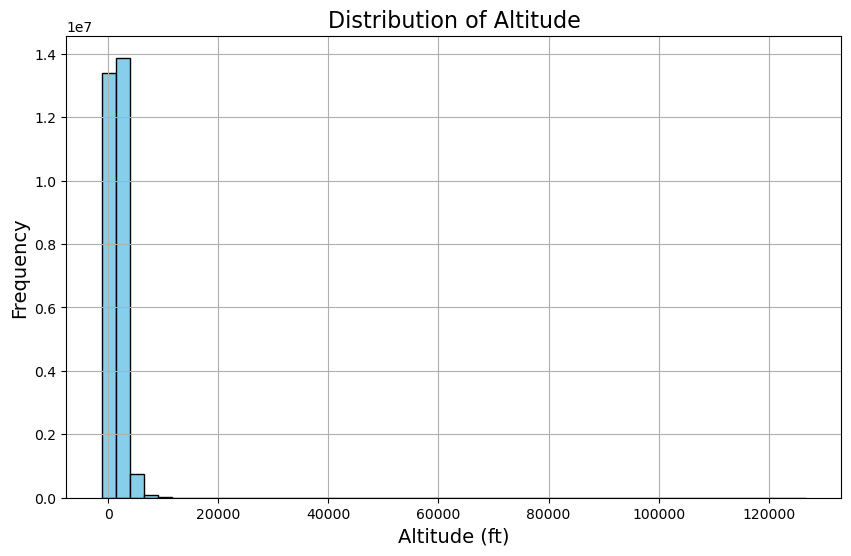

In [21]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json  # For deserialization

# File paths
flight_data_h5_path = "flight_data.h5"
dataset_key = "/data/table"  # Correct path to the dataset
chunk_size = 1_000_000  # Optimal for performance

# List to store altitude data from all chunks
altitude_data_list = []

# Process in chunks
with h5py.File(flight_data_h5_path, mode='r') as store:
    # Access the '/data/table' dataset
    dataset = store[dataset_key]
    
    # Retrieve and deserialize columns
    columns_json = dataset.attrs["columns"]  # Columns stored as a JSON string
    columns = json.loads(columns_json)  # Deserialize JSON into a list of strings

    if 'altitude' not in columns:
        raise KeyError("'altitude' column not found in the dataset.")

    altitude_field_name = 'altitude'  # Use the column name directly for structured arrays

    # Total rows in dataset
    total_rows = dataset.shape[0]
    print(f"Total rows in dataset: {total_rows:,}")

    # Read and process chunks
    for start_row in range(0, total_rows, chunk_size):
        end_row = min(start_row + chunk_size, total_rows)
        
        # Read chunk
        chunk_data = dataset[start_row:end_row]

        # Extract altitude data from the chunk using the field name
        altitude_data = chunk_data[altitude_field_name]

        # Add altitude data to the list
        altitude_data_list.extend(altitude_data)

        # Progress tracking
        print(f"Processed {end_row:,}/{total_rows:,} rows...", end='\r')

# Convert list to a numpy array for easier plotting
altitude_data_array = np.array(altitude_data_list)

# Plot histogram for altitude
plt.figure(figsize=(10, 6))
plt.hist(altitude_data_array, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Altitude', fontsize=16)
plt.xlabel('Altitude (ft)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


In this histogram plot for the altitude values, the histograms are **skewed to the left** which indicates that most of the flights fly at altitude range below 20,000 ft.

<span style="border-bottom: 2px solid black; font-size: 18px;">Histogram plot for Altitude values **<25,000 ft**</span> 

Total rows in dataset: 28,543,639


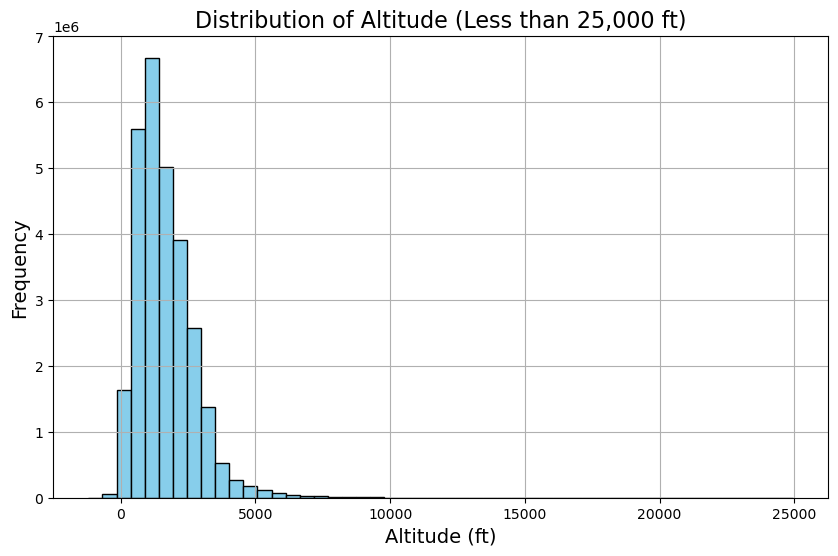

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json  # For deserialization

# File paths
flight_data_h5_path = "flight_data.h5"
dataset_key = "/data/table"  # Correct path to the dataset
chunk_size = 1_000_000  # Optimal for performance

# List to store altitude data from all chunks
altitude_data_list = []

# Process in chunks
with h5py.File(flight_data_h5_path, mode='r') as store:
    # Access the '/data/table' dataset
    dataset = store[dataset_key]
    
    # Retrieve and deserialize columns
    columns_json = dataset.attrs["columns"]  # Columns stored as a JSON string
    columns = json.loads(columns_json)  # Deserialize JSON into a list of strings

    if 'altitude' not in columns:
        raise KeyError("'altitude' column not found in the dataset.")

    altitude_field_name = 'altitude'  # Use the column name directly for structured arrays

    # Total rows in dataset
    total_rows = dataset.shape[0]
    print(f"Total rows in dataset: {total_rows:,}")

    # Read and process chunks
    for start_row in range(0, total_rows, chunk_size):
        end_row = min(start_row + chunk_size, total_rows)
        
        # Read chunk
        chunk_data = dataset[start_row:end_row]

        # Extract altitude data from the chunk using the field name
        altitude_data = chunk_data[altitude_field_name]

        # Filter altitude data to include only values less than 25,000 ft
        filtered_altitude_data = altitude_data[altitude_data < 25000]

        # Add filtered altitude data to the list
        altitude_data_list.extend(filtered_altitude_data)

        # Progress tracking
        print(f"Processed {end_row:,}/{total_rows:,} rows...", end='\r')

# Convert list to a numpy array for easier plotting
filtered_altitude_data_array = np.array(altitude_data_list)

# Plot histogram for altitude less than 25,000 ft
plt.figure(figsize=(10, 6))
plt.hist(filtered_altitude_data_array, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Altitude (Less than 25,000 ft)', fontsize=16)
plt.xlabel('Altitude (ft)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


This was plotted to get a clear picture of the altitude distribution. The tallest bar (between 1000 and 1500 ft), indicates the most common altitude range. There are multiple peaks which is an indication that the flights operate at different altitude groups.

<span style="border-bottom: 2px solid black; font-size: 18px;">Histogram plot for Altitude values **>25,000 ft**</span> 

Total rows in dataset: 28,543,639


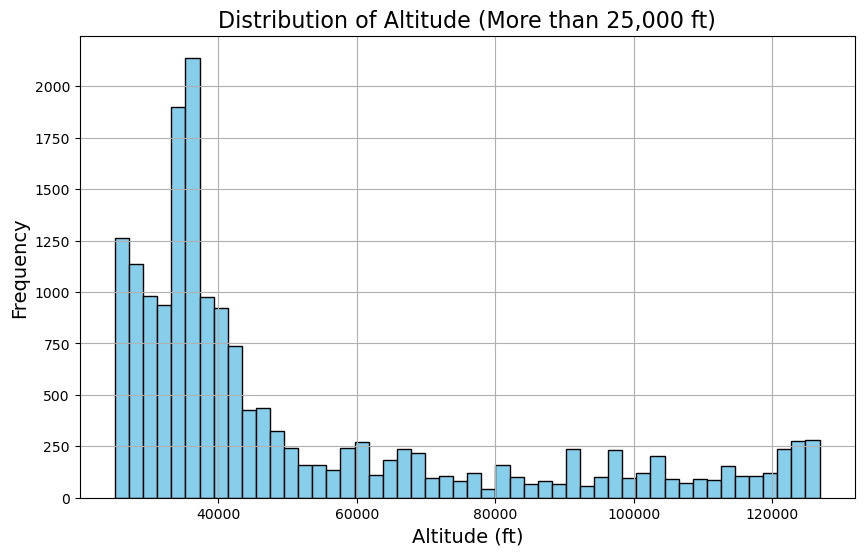

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json  # For deserialization

# File paths
flight_data_h5_path = "flight_data.h5"
dataset_key = "/data/table"  # Correct path to the dataset
chunk_size = 1_000_000  # Optimal for performance

# List to store altitude data from all chunks
altitude_data_list = []

# Process in chunks
with h5py.File(flight_data_h5_path, mode='r') as store:
    # Access the '/data/table' dataset
    dataset = store[dataset_key]
    
    # Retrieve and deserialize columns
    columns_json = dataset.attrs["columns"]  # Columns stored as a JSON string
    columns = json.loads(columns_json)  # Deserialize JSON into a list of strings

    if 'altitude' not in columns:
        raise KeyError("'altitude' column not found in the dataset.")

    altitude_field_name = 'altitude'  # Use the column name directly for structured arrays

    # Total rows in dataset
    total_rows = dataset.shape[0]
    print(f"Total rows in dataset: {total_rows:,}")

    # Read and process chunks
    for start_row in range(0, total_rows, chunk_size):
        end_row = min(start_row + chunk_size, total_rows)
        
        # Read chunk
        chunk_data = dataset[start_row:end_row]

        # Extract altitude data from the chunk using the field name
        altitude_data = chunk_data[altitude_field_name]

        # Filter altitude data to include only values more than 25,000 ft
        filtered_altitude_data = altitude_data[altitude_data > 25000]

        # Add filtered altitude data to the list
        altitude_data_list.extend(filtered_altitude_data)

        # Progress tracking
        print(f"Processed {end_row:,}/{total_rows:,} rows...", end='\r')

# Convert list to a numpy array for easier plotting
filtered_altitude_data_array = np.array(altitude_data_list)

# Plot histogram for altitude more than 25,000 ft
plt.figure(figsize=(10, 6))
plt.hist(filtered_altitude_data_array, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Altitude (More than 25,000 ft)', fontsize=16)
plt.xlabel('Altitude (ft)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


This plot shows the number of data points with altitude values more than 25,000 ft. The frequency is very low compared to the total data points.

<span style="border-bottom: 2px solid black; font-size: 18px;">Histogram plot for Geoltitude values</span> 

Total rows in dataset: 28,543,639


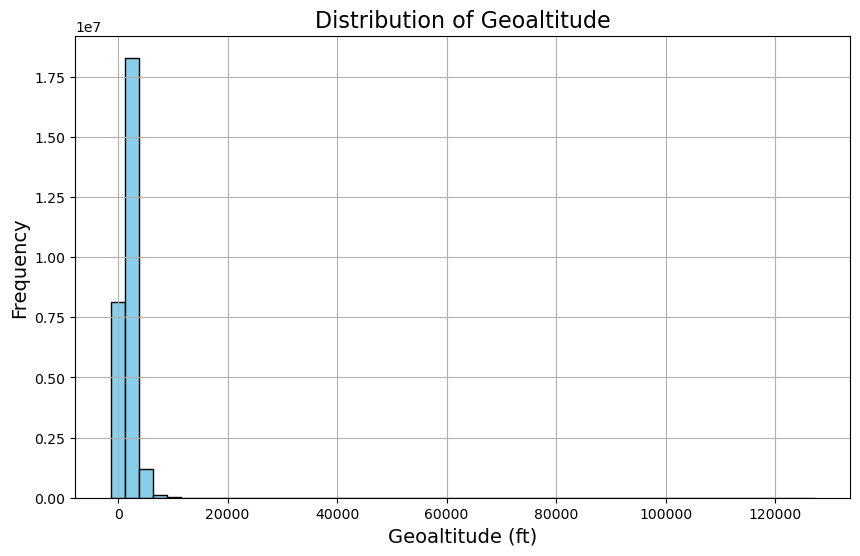

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json  # For deserialization

# File paths
flight_data_h5_path = "flight_data.h5"
dataset_key = "/data/table"  # Correct path to the dataset
chunk_size = 1_000_000  # Optimal for performance

# List to store geoaltitude data from all chunks
geoaltitude_data_list = []

# Process in chunks
with h5py.File(flight_data_h5_path, mode='r') as store:
    # Access the '/data/table' dataset
    dataset = store[dataset_key]
    
    # Retrieve and deserialize columns
    columns_json = dataset.attrs["columns"]  # Columns stored as a JSON string
    columns = json.loads(columns_json)  # Deserialize JSON into a list of strings

    if 'geoaltitude' not in columns:
        raise KeyError("'geoaltitude' column not found in the dataset.")

    geoaltitude_field_name = 'geoaltitude'  # Use the column name directly for structured arrays

    # Total rows in dataset
    total_rows = dataset.shape[0]
    print(f"Total rows in dataset: {total_rows:,}")

    # Read and process chunks
    for start_row in range(0, total_rows, chunk_size):
        end_row = min(start_row + chunk_size, total_rows)
        
        # Read chunk
        chunk_data = dataset[start_row:end_row]

        # Extract geoaltitude data from the chunk using the field name
        geoaltitude_data = chunk_data[geoaltitude_field_name]

        # Add geoaltitude data to the list
        geoaltitude_data_list.extend(geoaltitude_data)

        # Progress tracking
        print(f"Processed {end_row:,}/{total_rows:,} rows...", end='\r')

# Convert list to a numpy array for easier plotting
geoaltitude_data_array = np.array(geoaltitude_data_list)

# Plot histogram for geoaltitude
plt.figure(figsize=(10, 6))
plt.hist(geoaltitude_data_array, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Geoaltitude', fontsize=16)
plt.xlabel('Geoaltitude (ft)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


In this histogram plot for the geoaltitude values, the histograms are **skewed to the left** which indicates that most of the flights fly at geoaltitude range below 20,000 ft.

<span style="border-bottom: 2px solid black; font-size: 18px;">Histogram plot for Geoaltitude values **<25,000 ft**</span> 

Total rows in dataset: 28,543,639


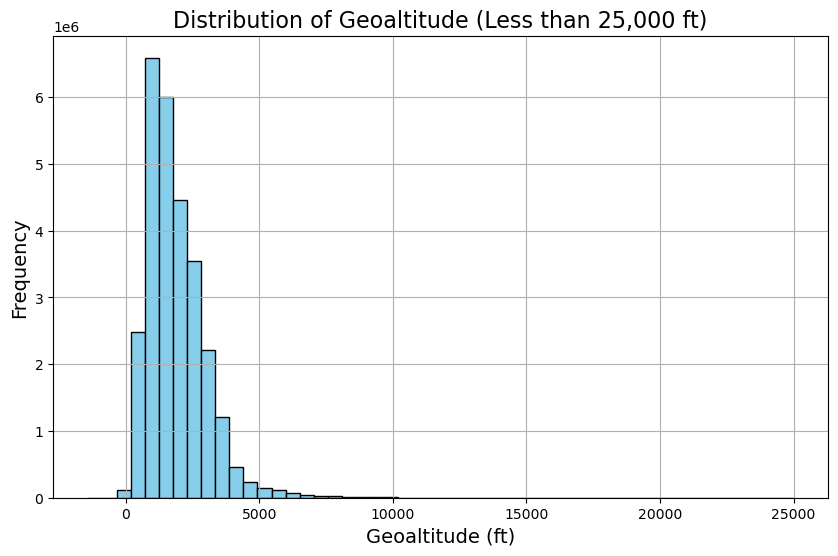

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json  # For deserialization

# File paths
flight_data_h5_path = "flight_data.h5"
dataset_key = "/data/table"  # Correct path to the dataset
chunk_size = 1_000_000  # Optimal for performance

# List to store filtered geoaltitude data from all chunks
filtered_geoaltitude_data_list = []

# Process in chunks
with h5py.File(flight_data_h5_path, mode='r') as store:
    # Access the '/data/table' dataset
    dataset = store[dataset_key]
    
    # Retrieve and deserialize columns
    columns_json = dataset.attrs["columns"]  # Columns stored as a JSON string
    columns = json.loads(columns_json)  # Deserialize JSON into a list of strings

    if 'geoaltitude' not in columns:
        raise KeyError("'geoaltitude' column not found in the dataset.")

    geoaltitude_field_name = 'geoaltitude'  # Use the column name directly for structured arrays

    # Total rows in dataset
    total_rows = dataset.shape[0]
    print(f"Total rows in dataset: {total_rows:,}")

    # Read and process chunks
    for start_row in range(0, total_rows, chunk_size):
        end_row = min(start_row + chunk_size, total_rows)
        
        # Read chunk
        chunk_data = dataset[start_row:end_row]

        # Extract geoaltitude data from the chunk using the field name
        geoaltitude_data = chunk_data[geoaltitude_field_name]

        # Filter geoaltitude data to include only values less than 25,000 ft
        filtered_geoaltitude_data = geoaltitude_data[geoaltitude_data < 25000]

        # Add filtered geoaltitude data to the list
        filtered_geoaltitude_data_list.extend(filtered_geoaltitude_data)

        # Progress tracking
        print(f"Processed {end_row:,}/{total_rows:,} rows...", end='\r')

# Convert list to a numpy array for easier plotting
filtered_geoaltitude_data_array = np.array(filtered_geoaltitude_data_list)

# Plot the histogram for filtered geoaltitude data
plt.figure(figsize=(10, 6))
plt.hist(filtered_geoaltitude_data_array, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Geoaltitude (Less than 25,000 ft)', fontsize=16)
plt.xlabel('Geoaltitude (ft)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

<span style="border-bottom: 2px solid black; font-size: 18px;">Histogram plot for Geoaltitude values **>25,000 ft**</span> 

Total rows in dataset: 28,543,639


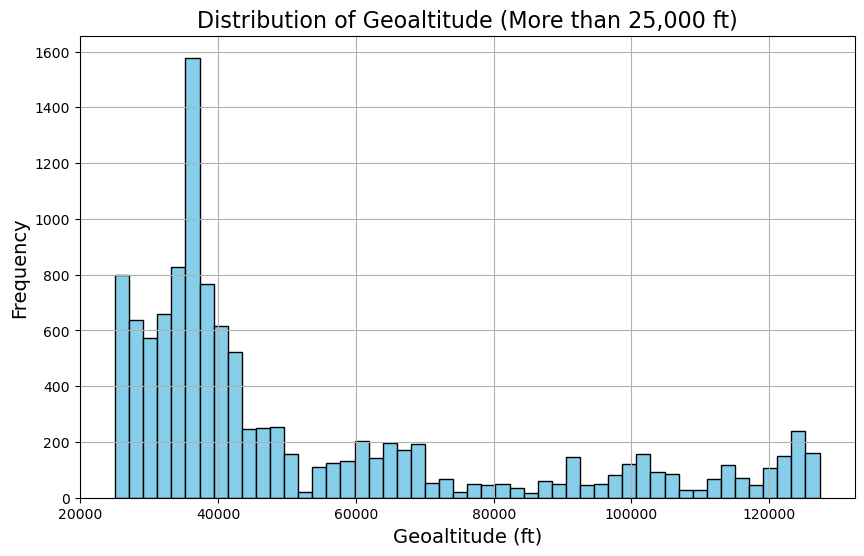

In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json  # For deserialization

# File paths
flight_data_h5_path = "flight_data.h5"
dataset_key = "/data/table"  # Correct path to the dataset
chunk_size = 1_000_000  # Optimal for performance

# List to store filtered geoaltitude data from all chunks
filtered_geoaltitude_data_list = []

# Process in chunks
with h5py.File(flight_data_h5_path, mode='r') as store:
    # Access the '/data/table' dataset
    dataset = store[dataset_key]
    
    # Retrieve and deserialize columns
    columns_json = dataset.attrs["columns"]  # Columns stored as a JSON string
    columns = json.loads(columns_json)  # Deserialize JSON into a list of strings

    if 'geoaltitude' not in columns:
        raise KeyError("'geoaltitude' column not found in the dataset.")

    geoaltitude_field_name = 'geoaltitude'  # Use the column name directly for structured arrays

    # Total rows in dataset
    total_rows = dataset.shape[0]
    print(f"Total rows in dataset: {total_rows:,}")

    # Read and process chunks
    for start_row in range(0, total_rows, chunk_size):
        end_row = min(start_row + chunk_size, total_rows)
        
        # Read chunk
        chunk_data = dataset[start_row:end_row]

        # Extract geoaltitude data from the chunk using the field name
        geoaltitude_data = chunk_data[geoaltitude_field_name]

        # Filter geoaltitude data to include only values greater than 25,000 ft
        filtered_geoaltitude_data = geoaltitude_data[geoaltitude_data > 25000]

        # Add filtered geoaltitude data to the list
        filtered_geoaltitude_data_list.extend(filtered_geoaltitude_data)

        # Progress tracking
        print(f"Processed {end_row:,}/{total_rows:,} rows...", end='\r')

# Convert list to a numpy array for easier plotting
filtered_geoaltitude_data_array = np.array(filtered_geoaltitude_data_list)

# Plot the histogram for filtered geoaltitude data
plt.figure(figsize=(10, 6))
plt.hist(filtered_geoaltitude_data_array, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Geoaltitude (More than 25,000 ft)', fontsize=16)
plt.xlabel('Geoaltitude (ft)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


This plot shows the number of data points with geoaltitude values more than 25,000 ft. The frequency is very low compared to the total data points.

From the above altitude and geoaltitude histogram plots, it is very much evident that most of the flights altitude value is **less than 25,000 ft**. Comparing the huge data set, only small number of values go above 25,000 ft. These datas above 25,000 ft can be negected for further evaluation if required.

<span style="border-bottom: 2px solid black; font-size: 18px;">Histogram plot for Latitude values</span> 

Total rows in dataset: 28,543,639


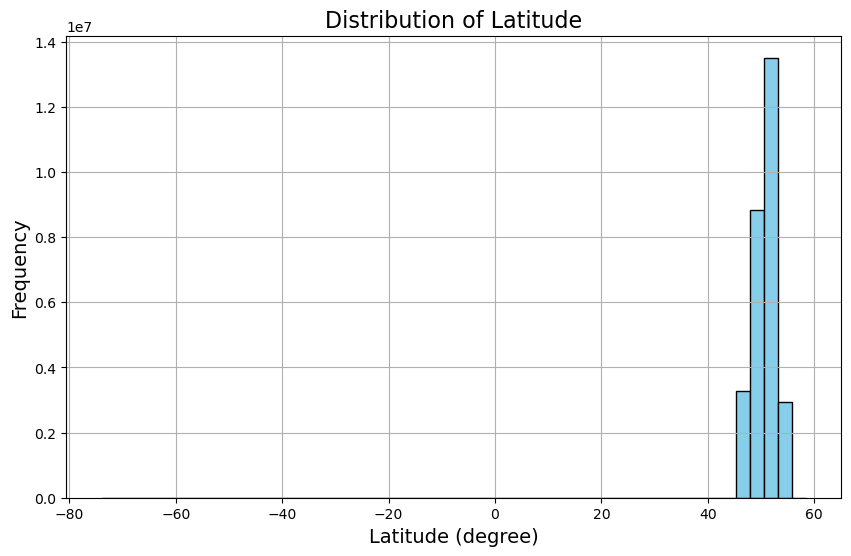

In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json  # For deserialization

# File paths
flight_data_h5_path = "flight_data.h5"
dataset_key = "/data/table"  # Correct path to the dataset
chunk_size = 1_000_000  # Optimal for performance

# List to store latitude data from all chunks
latitude_data_list = []

# Process in chunks
with h5py.File(flight_data_h5_path, mode='r') as store:
    # Access the '/data/table' dataset
    dataset = store[dataset_key]
    
    # Retrieve and deserialize columns
    columns_json = dataset.attrs["columns"]  # Columns stored as a JSON string
    columns = json.loads(columns_json)  # Deserialize JSON into a list of strings

    if 'latitude' not in columns:
        raise KeyError("'latitude' column not found in the dataset.")

    latitude_field_name = 'latitude'  # Use the column name directly for structured arrays

    # Total rows in dataset
    total_rows = dataset.shape[0]
    print(f"Total rows in dataset: {total_rows:,}")

    # Read and process chunks
    for start_row in range(0, total_rows, chunk_size):
        end_row = min(start_row + chunk_size, total_rows)
        
        # Read chunk
        chunk_data = dataset[start_row:end_row]

        # Extract latitude data from the chunk using the field name
        latitude_data = chunk_data[latitude_field_name]

        # Add latitude data to the list
        latitude_data_list.extend(latitude_data)

        # Progress tracking
        print(f"Processed {end_row:,}/{total_rows:,} rows...", end='\r')

# Convert list to a numpy array for easier plotting
latitude_data_array = np.array(latitude_data_list)

# Plot the histogram for latitude data
plt.figure(figsize=(10, 6))
plt.hist(latitude_data_array, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Latitude', fontsize=16)
plt.xlabel('Latitude (degree)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


This is the histogram plot for the whole dataset and the histograms are **skewed to the right** indicating more flights are concentrated in certain latitude ranges (between 40 and 60 degree).

<span style="border-bottom: 2px solid black; font-size: 18px;">Histogram plot for Latitude values **between 40 and 60**</span>

Total rows in dataset: 28,543,639


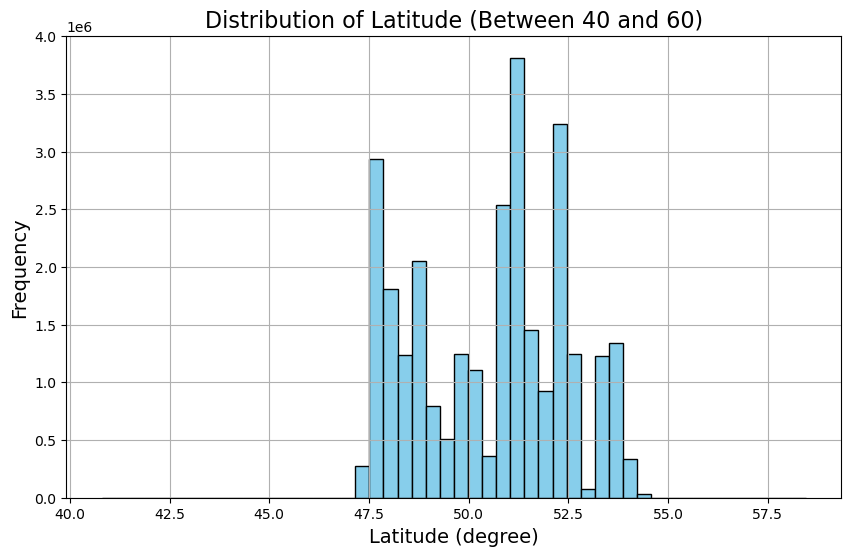

In [7]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json  # For deserialization

# File paths
flight_data_h5_path = "flight_data.h5"
dataset_key = "/data/table"  # Correct path to the dataset
chunk_size = 1_000_000  # Optimal for performance

# List to store filtered latitude data from all chunks
filtered_latitude_data_list = []

# Process in chunks
with h5py.File(flight_data_h5_path, mode='r') as store:
    # Access the '/data/table' dataset
    dataset = store[dataset_key]
    
    # Retrieve and deserialize columns
    columns_json = dataset.attrs["columns"]  # Columns stored as a JSON string
    columns = json.loads(columns_json)  # Deserialize JSON into a list of strings

    if 'latitude' not in columns:
        raise KeyError("'latitude' column not found in the dataset.")

    latitude_field_name = 'latitude'  # Use the column name directly for structured arrays

    # Total rows in dataset
    total_rows = dataset.shape[0]
    print(f"Total rows in dataset: {total_rows:,}")

    # Read and process chunks
    for start_row in range(0, total_rows, chunk_size):
        end_row = min(start_row + chunk_size, total_rows)
        
        # Read chunk
        chunk_data = dataset[start_row:end_row]

        # Extract latitude data from the chunk using the field name
        latitude_data = chunk_data[latitude_field_name]

        # Filter latitude data to include only values between 40 and 60
        filtered_latitude_data = latitude_data[(latitude_data >= 40) & (latitude_data <= 60)]

        # Add filtered latitude data to the list
        filtered_latitude_data_list.extend(filtered_latitude_data)

        # Progress tracking
        print(f"Processed {end_row:,}/{total_rows:,} rows...", end='\r')

# Convert list to a numpy array for easier plotting
filtered_latitude_data_array = np.array(filtered_latitude_data_list)

# Plot the histogram for filtered latitude data
plt.figure(figsize=(10, 6))
plt.hist(filtered_latitude_data_array, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Latitude (Between 40 and 60)', fontsize=16)
plt.xlabel('Latitude (degree)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
# Show the plot
plt.show()


This is the histogram plot for the latitude range between 40 and 60 degree. The spread is narrow suggesting that the flights are concentrated in a specific latitude zone.

<span style="border-bottom: 2px solid black; font-size: 18px;">Histogram plot for Longitude values</span> 

Total rows in dataset: 28,543,639


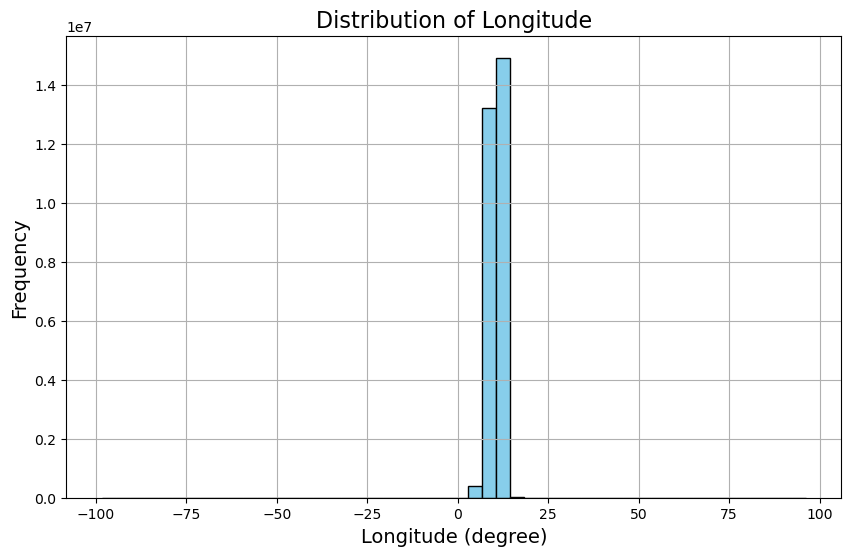

In [8]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json  # For deserialization

# File paths
flight_data_h5_path = "flight_data.h5"
dataset_key = "/data/table"  # Correct path to the dataset
chunk_size = 1_000_000  # Optimal for performance

# List to store longitude data from all chunks
longitude_data_list = []

# Process in chunks
with h5py.File(flight_data_h5_path, mode='r') as store:
    # Access the '/data/table' dataset
    dataset = store[dataset_key]
    
    # Retrieve and deserialize columns
    columns_json = dataset.attrs["columns"]  # Columns stored as a JSON string
    columns = json.loads(columns_json)  # Deserialize JSON into a list of strings

    if 'longitude' not in columns:
        raise KeyError("'longitude' column not found in the dataset.")

    longitude_field_name = 'longitude'  # Use the column name directly for structured arrays

    # Total rows in dataset
    total_rows = dataset.shape[0]
    print(f"Total rows in dataset: {total_rows:,}")

    # Read and process chunks
    for start_row in range(0, total_rows, chunk_size):
        end_row = min(start_row + chunk_size, total_rows)
        
        # Read chunk
        chunk_data = dataset[start_row:end_row]

        # Extract longitude data from the chunk using the field name
        longitude_data = chunk_data[longitude_field_name]

        # Add longitude data to the list
        longitude_data_list.extend(longitude_data)

        # Progress tracking
        print(f"Processed {end_row:,}/{total_rows:,} rows...", end='\r')

# Convert list to a numpy array for easier plotting
longitude_data_array = np.array(longitude_data_list)

# Plot the histogram for longitude data
plt.figure(figsize=(10, 6))
plt.hist(longitude_data_array, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Longitude', fontsize=16)
plt.xlabel('Longitude (degree)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
# Show the plot
plt.show()

This is the histogram plot for the whole dataset and the histograms are skewed indicating more flights are concentrated in certain longitude ranges (between 0 and 20 degree).

<span style="border-bottom: 2px solid black; font-size: 18px;">Histogram plot for Longitude values **between 0 and 20**</span>

Total rows in dataset: 28,543,639


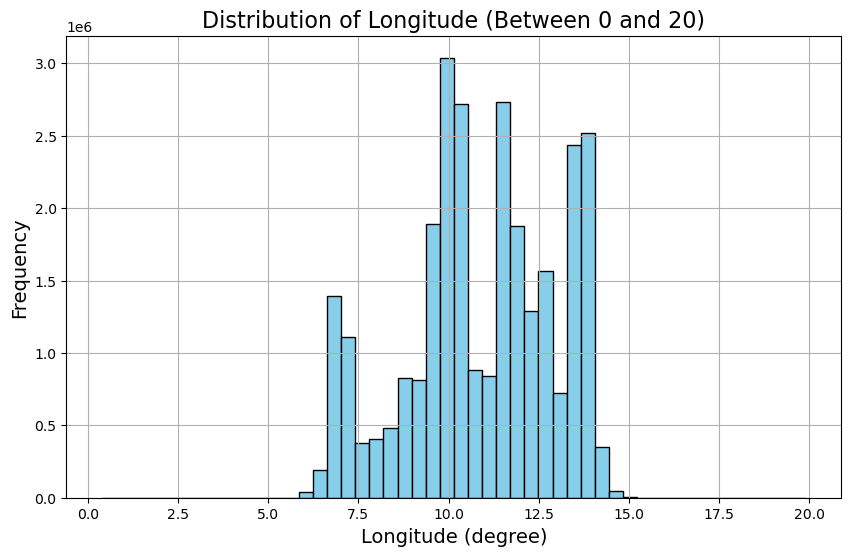

In [9]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json  # For deserialization

# File paths
flight_data_h5_path = "flight_data.h5"
dataset_key = "/data/table"  # Correct path to the dataset
chunk_size = 1_000_000  # Optimal for performance

# List to store filtered longitude data
filtered_longitude_data_list = []

# Process in chunks
with h5py.File(flight_data_h5_path, mode='r') as store:
    # Access the '/data/table' dataset
    dataset = store[dataset_key]
    
    # Retrieve and deserialize columns
    columns_json = dataset.attrs["columns"]  # Columns stored as a JSON string
    columns = json.loads(columns_json)  # Deserialize JSON into a list of strings

    if 'longitude' not in columns:
        raise KeyError("'longitude' column not found in the dataset.")

    longitude_field_name = 'longitude'  # Use the column name directly for structured arrays

    # Total rows in dataset
    total_rows = dataset.shape[0]
    print(f"Total rows in dataset: {total_rows:,}")

    # Read and process chunks
    for start_row in range(0, total_rows, chunk_size):
        end_row = min(start_row + chunk_size, total_rows)
        
        # Read chunk
        chunk_data = dataset[start_row:end_row]

        # Extract longitude data from the chunk using the field name
        longitude_data = chunk_data[longitude_field_name]

        # Filter data to include only values between 0 and 20
        filtered_longitude_data = longitude_data[(longitude_data >= 0) & (longitude_data <= 20)]

        # Add filtered data to the list
        filtered_longitude_data_list.extend(filtered_longitude_data)

        # Progress tracking
        print(f"Processed {end_row:,}/{total_rows:,} rows...", end='\r')

# Convert list to a numpy array for easier plotting
filtered_longitude_data_array = np.array(filtered_longitude_data_list)

# Plot the histogram for filtered longitude data
plt.figure(figsize=(10, 6))
plt.hist(filtered_longitude_data_array, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Longitude (Between 0 and 20)', fontsize=16)
plt.xlabel('Longitude (degree)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
# Show the plot
plt.show()


This is the histogram plot for the longitude range between 0 and 20 degree. The spread is narrow suggesting that the flights are concentrated in a specific longitude zone.

<span style="border-bottom: 2px solid black; font-size: 18px;">Scatter plot between Altitude and Geoaltitude</span>

Total rows in dataset: 28,543,639


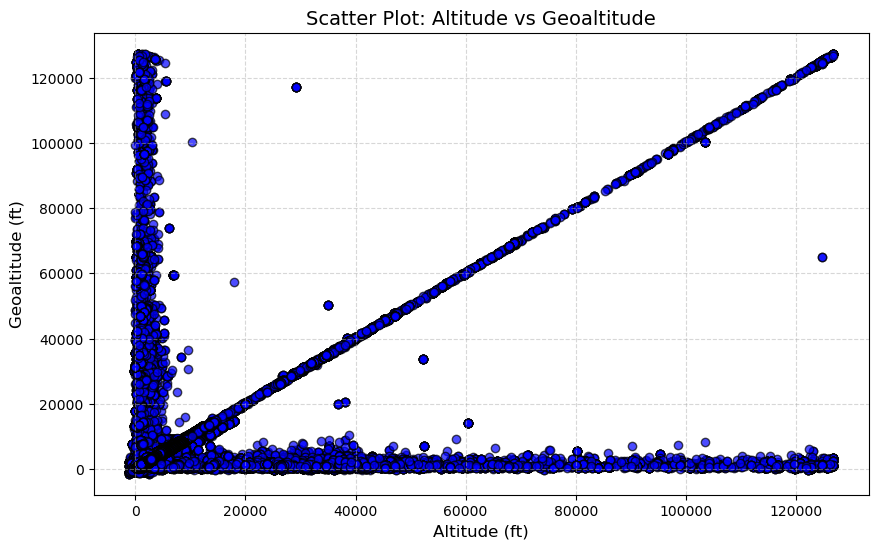

In [10]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json  # For deserialization

# File paths
flight_data_h5_path = "flight_data.h5"
dataset_key = "/data/table"  # Correct path to the dataset
chunk_size = 1_000_000  # Optimal for performance

# Lists to store altitude and geoaltitude data
altitude_data_list = []
geoaltitude_data_list = []

# Process in chunks
with h5py.File(flight_data_h5_path, mode='r') as store:
    # Access the '/data/table' dataset
    dataset = store[dataset_key]
    
    # Retrieve and deserialize columns
    columns_json = dataset.attrs["columns"]  # Columns stored as a JSON string
    columns = json.loads(columns_json)  # Deserialize JSON into a list of strings

    if 'altitude' not in columns or 'geoaltitude' not in columns:
        raise KeyError("Both 'altitude' and 'geoaltitude' columns must be present in the dataset.")

    altitude_field_name = 'altitude'
    geoaltitude_field_name = 'geoaltitude'

    # Total rows in dataset
    total_rows = dataset.shape[0]
    print(f"Total rows in dataset: {total_rows:,}")

    # Read and process chunks
    for start_row in range(0, total_rows, chunk_size):
        end_row = min(start_row + chunk_size, total_rows)
        
        # Read chunk
        chunk_data = dataset[start_row:end_row]

        # Extract altitude and geoaltitude data
        altitude_data = chunk_data[altitude_field_name]
        geoaltitude_data = chunk_data[geoaltitude_field_name]

        # Add data to respective lists
        altitude_data_list.extend(altitude_data)
        geoaltitude_data_list.extend(geoaltitude_data)

        # Progress tracking
        print(f"Processed {end_row:,}/{total_rows:,} rows...", end='\r')

# Convert lists to numpy arrays for plotting
altitude_data_array = np.array(altitude_data_list)
geoaltitude_data_array = np.array(geoaltitude_data_list)

# Plot the scatter plot for altitude vs geoaltitude
plt.figure(figsize=(10, 6))
plt.scatter(altitude_data_array, geoaltitude_data_array, alpha=0.7, edgecolor='k', c='blue')
plt.title('Scatter Plot: Altitude vs Geoaltitude', fontsize=14)
plt.xlabel('Altitude (ft)', fontsize=12)
plt.ylabel('Geoaltitude (ft)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


This scatter plot visualizes the relationship between altitude and geoaltitude.This plot suggests that altitude and geoaltitude are **tightly correlated** because the points on the scatter plot are aligned along a straight line (either diagonal or with a distinct pattern).Points that lie far away from the general trend  indicate outliers.Outliers could represent anomalies in data collection or special cases, such as incorrect measurements or locations with unique topgrapoic conditions.

<span style="border-bottom: 2px solid black; font-size: 18px;">Scatter plot between Latitude and Longitude</span>

Total rows in dataset: 28,543,639


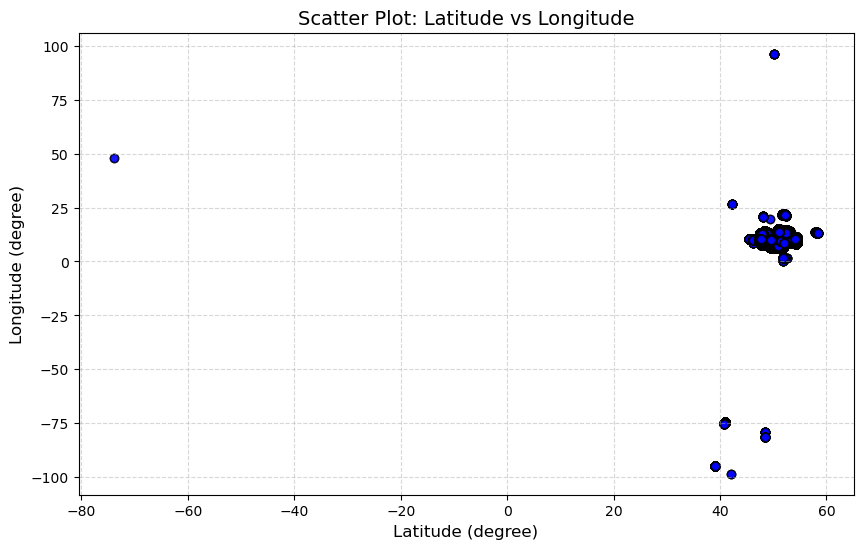

In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json  # For deserialization

# File paths
flight_data_h5_path = "flight_data.h5"
dataset_key = "/data/table"  # Correct path to the dataset
chunk_size = 1_000_000  # Optimal for performance

# Lists to store latitude and longitude data
latitude_data_list = []
longitude_data_list = []

# Process in chunks
with h5py.File(flight_data_h5_path, mode='r') as store:
    # Access the '/data/table' dataset
    dataset = store[dataset_key]
    
    # Retrieve and deserialize columns
    columns_json = dataset.attrs["columns"]  # Columns stored as a JSON string
    columns = json.loads(columns_json)  # Deserialize JSON into a list of strings

    if 'latitude' not in columns or 'longitude' not in columns:
        raise KeyError("Both 'latitude' and 'longitude' columns must be present in the dataset.")

    latitude_field_name = 'latitude'
    longitude_field_name = 'longitude'

    # Total rows in dataset
    total_rows = dataset.shape[0]
    print(f"Total rows in dataset: {total_rows:,}")

    # Read and process chunks
    for start_row in range(0, total_rows, chunk_size):
        end_row = min(start_row + chunk_size, total_rows)
        
        # Read chunk
        chunk_data = dataset[start_row:end_row]

        # Extract latitude and longitude data
        latitude_data = chunk_data[latitude_field_name]
        longitude_data = chunk_data[longitude_field_name]

        # Add data to respective lists
        latitude_data_list.extend(latitude_data)
        longitude_data_list.extend(longitude_data)

        # Progress tracking
        print(f"Processed {end_row:,}/{total_rows:,} rows...", end='\r')

# Convert lists to numpy arrays for plotting
latitude_data_array = np.array(latitude_data_list)
longitude_data_array = np.array(longitude_data_list)

# Scatter plot for latitude vs longitude
plt.figure(figsize=(10, 6))
plt.scatter(latitude_data_array, longitude_data_array, alpha=0.7, edgecolor='k', c='blue')
plt.title('Scatter Plot: Latitude vs Longitude', fontsize=14)
plt.xlabel('Latitude (degree)', fontsize=12)
plt.ylabel('Longitude (degree)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


The points on the scatter plot represent the distribution of locations with respect to their latitudes and longitudes.Most of the points form a distinct cluster or group, it indicates that many of the data points share similar latitude and longitude values, which could suggest a specific region or area with a high concentration of locations. Points far away from the main cluster indicate outliers, possibly representing unusual or rare geographical locations.

<span style="border-bottom: 2px solid black; font-size: 18px;">Time-Series plot for Altitude and Geoaltitude over Time</span>

Total rows in dataset: 28,543,639


/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


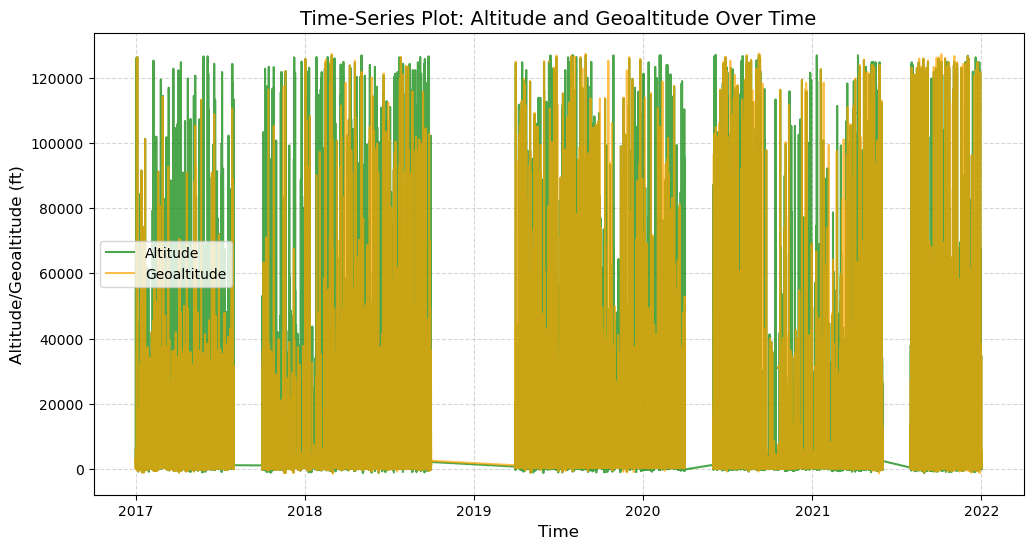

In [12]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json  # For deserialization
import pandas as pd  # For handling timestamps

# File paths
flight_data_h5_path = "flight_data.h5"
dataset_key = "/data/table"  # Correct path to the dataset
chunk_size = 1_000_000  # Optimal for performance

# Lists to store timestamp, altitude, and geoaltitude data
timestamp_data_list = []
altitude_data_list = []
geoaltitude_data_list = []

# Process in chunks
with h5py.File(flight_data_h5_path, mode='r') as store:
    # Access the '/data/table' dataset
    dataset = store[dataset_key]
    
    # Retrieve and deserialize columns
    columns_json = dataset.attrs["columns"]  # Columns stored as a JSON string
    columns = json.loads(columns_json)  # Deserialize JSON into a list of strings

    if 'timestamp' not in columns or 'altitude' not in columns or 'geoaltitude' not in columns:
        raise KeyError("Columns 'timestamp', 'altitude', and 'geoaltitude' must be present in the dataset.")

    timestamp_field_name = 'timestamp'
    altitude_field_name = 'altitude'
    geoaltitude_field_name = 'geoaltitude'

    # Total rows in dataset
    total_rows = dataset.shape[0]
    print(f"Total rows in dataset: {total_rows:,}")

    # Read and process chunks
    for start_row in range(0, total_rows, chunk_size):
        end_row = min(start_row + chunk_size, total_rows)
        
        # Read chunk
        chunk_data = dataset[start_row:end_row]

        # Extract timestamp, altitude, and geoaltitude data
        timestamp_data = chunk_data[timestamp_field_name]
        altitude_data = chunk_data[altitude_field_name]
        geoaltitude_data = chunk_data[geoaltitude_field_name]

        # Convert timestamp to datetime (assuming it's in string format)
        timestamp_data = pd.to_datetime(timestamp_data)

        # Add data to respective lists
        timestamp_data_list.extend(timestamp_data)
        altitude_data_list.extend(altitude_data)
        geoaltitude_data_list.extend(geoaltitude_data)

        # Progress tracking
        print(f"Processed {end_row:,}/{total_rows:,} rows...", end='\r')

# Convert lists to numpy arrays for plotting
timestamp_data_array = np.array(timestamp_data_list)
altitude_data_array = np.array(altitude_data_list)
geoaltitude_data_array = np.array(geoaltitude_data_list)

# Plot the time-series for altitude and geoaltitude
plt.figure(figsize=(12, 6))
plt.plot(timestamp_data_array, altitude_data_array, label='Altitude', color='green', alpha=0.7)
plt.plot(timestamp_data_array, geoaltitude_data_array, label='Geoaltitude', color='orange', alpha=0.7)

# Customize the plot
plt.title('Time-Series Plot: Altitude and Geoaltitude Over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Altitude/Geoaltitude (ft)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


This time-series plot visualizes how altitude and geoaltitude change over time, with timestamp being the independent variable on the x-axis.<br>The green line represents the altitude over time. The orange line represents the geoaltitude over time.<br>Both altitude and geoaltitude are closely aligned in the plot, suggesting that both measurements track similarly over time. This indicates a strong correlation between the two.

<span style="border-bottom: 2px solid black; font-size: 18px;">Time-Series plot for Altitude over Time</span>

Total rows in dataset: 28,543,639


/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


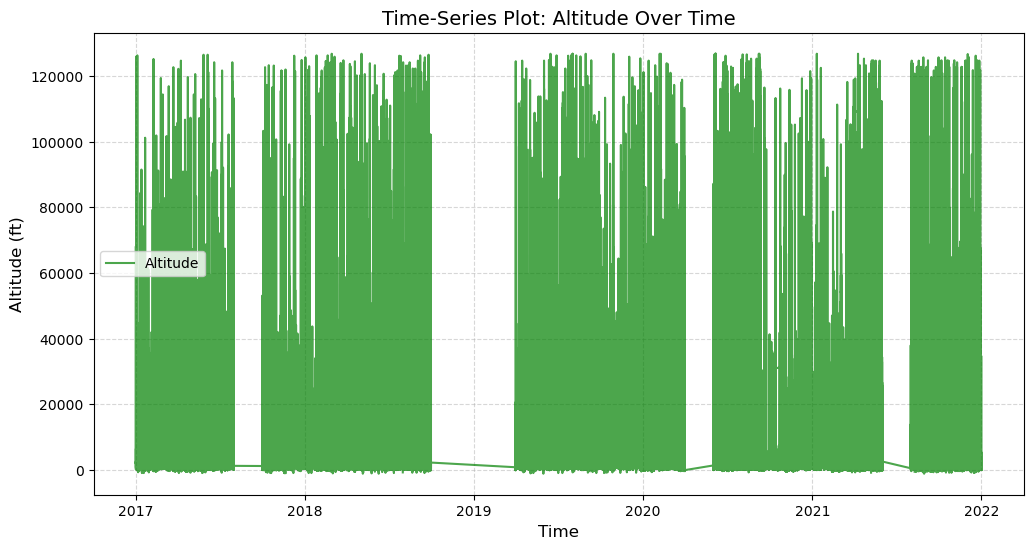

In [13]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json  # For deserialization
import pandas as pd  # For handling timestamps

# File paths
flight_data_h5_path = "flight_data.h5"
dataset_key = "/data/table"  # Correct path to the dataset
chunk_size = 1_000_000  # Optimal for performance

# List to store timestamp and altitude data
timestamp_data_list = []
altitude_data_list = []

# Process in chunks
with h5py.File(flight_data_h5_path, mode='r') as store:
    # Access the '/data/table' dataset
    dataset = store[dataset_key]
    
    # Retrieve and deserialize columns
    columns_json = dataset.attrs["columns"]  # Columns stored as a JSON string
    columns = json.loads(columns_json)  # Deserialize JSON into a list of strings

    if 'timestamp' not in columns or 'altitude' not in columns:
        raise KeyError("Columns 'timestamp' and 'altitude' must be present in the dataset.")

    timestamp_field_name = 'timestamp'
    altitude_field_name = 'altitude'

    # Total rows in dataset
    total_rows = dataset.shape[0]
    print(f"Total rows in dataset: {total_rows:,}")

    # Read and process chunks
    for start_row in range(0, total_rows, chunk_size):
        end_row = min(start_row + chunk_size, total_rows)
        
        # Read chunk
        chunk_data = dataset[start_row:end_row]

        # Extract timestamp and altitude data
        timestamp_data = chunk_data[timestamp_field_name]
        altitude_data = chunk_data[altitude_field_name]

        # Convert timestamp to datetime (assuming it's in string format)
        timestamp_data = pd.to_datetime(timestamp_data)

        # Add data to respective lists
        timestamp_data_list.extend(timestamp_data)
        altitude_data_list.extend(altitude_data)

        # Progress tracking
        print(f"Processed {end_row:,}/{total_rows:,} rows...", end='\r')

# Convert lists to numpy arrays for plotting
timestamp_data_array = np.array(timestamp_data_list)
altitude_data_array = np.array(altitude_data_list)

# Plot the time-series for altitude
plt.figure(figsize=(12, 6))
plt.plot(timestamp_data_array, altitude_data_array, label='Altitude', color='green', alpha=0.7)

# Customize the plot
plt.title('Time-Series Plot: Altitude Over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Altitude (ft)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


This time-series plot visualizes how altitude changes over time, with timestamp as the independent variable on the x-axis.The green line represents the altitude over time. It shows how the altitude fluctuates or remains constant as time progresses.

<span style="border-bottom: 2px solid black; font-size: 18px;">Time-Series plot for Latitude and Longitude over Time</span>

Total rows in dataset: 28,543,639


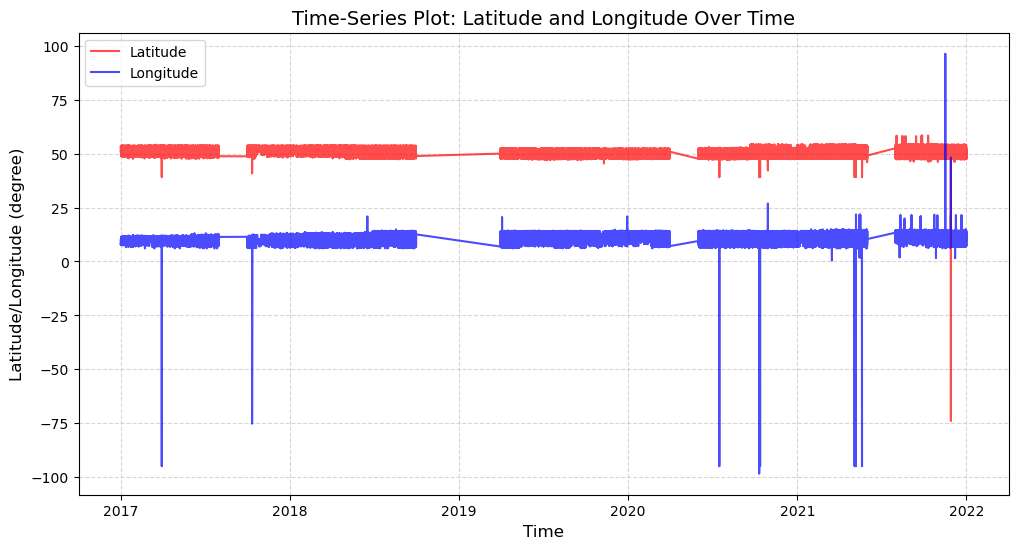

In [14]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json  # For deserialization
import pandas as pd  # For handling timestamps

# File paths
flight_data_h5_path = "flight_data.h5"
dataset_key = "/data/table"  # Correct path to the dataset
chunk_size = 1_000_000  # Optimal for performance

# Lists to store timestamp, latitude, and longitude data
timestamp_data_list = []
latitude_data_list = []
longitude_data_list = []

# Process in chunks
with h5py.File(flight_data_h5_path, mode='r') as store:
    # Access the '/data/table' dataset
    dataset = store[dataset_key]
    
    # Retrieve and deserialize columns
    columns_json = dataset.attrs["columns"]  # Columns stored as a JSON string
    columns = json.loads(columns_json)  # Deserialize JSON into a list of strings

    if 'timestamp' not in columns or 'latitude' not in columns or 'longitude' not in columns:
        raise KeyError("Columns 'timestamp', 'latitude', and 'longitude' must be present in the dataset.")

    timestamp_field_name = 'timestamp'
    latitude_field_name = 'latitude'
    longitude_field_name = 'longitude'

    # Total rows in dataset
    total_rows = dataset.shape[0]
    print(f"Total rows in dataset: {total_rows:,}")

    # Read and process chunks
    for start_row in range(0, total_rows, chunk_size):
        end_row = min(start_row + chunk_size, total_rows)
        
        # Read chunk
        chunk_data = dataset[start_row:end_row]

        # Extract timestamp, latitude, and longitude data
        timestamp_data = chunk_data[timestamp_field_name]
        latitude_data = chunk_data[latitude_field_name]
        longitude_data = chunk_data[longitude_field_name]

        # Convert timestamp to datetime (assuming it's in string format)
        timestamp_data = pd.to_datetime(timestamp_data)

        # Add data to respective lists
        timestamp_data_list.extend(timestamp_data)
        latitude_data_list.extend(latitude_data)
        longitude_data_list.extend(longitude_data)

        # Progress tracking
        print(f"Processed {end_row:,}/{total_rows:,} rows...", end='\r')

# Convert lists to numpy arrays for plotting
timestamp_data_array = np.array(timestamp_data_list)
latitude_data_array = np.array(latitude_data_list)
longitude_data_array = np.array(longitude_data_list)

# Plot the time-series for latitude and longitude
plt.figure(figsize=(12, 6))
plt.plot(timestamp_data_array, latitude_data_array, label='Latitude', color='red', alpha=0.7)
plt.plot(timestamp_data_array, longitude_data_array, label='Longitude', color='blue', alpha=0.7)

# Customize the plot
plt.title('Time-Series Plot: Latitude and Longitude Over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Latitude/Longitude (degree)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


This time-series plot visualizes the changes in latitude and longitude over time, with timestamp as the independent variable on the x-axis.<br>The red line represents latitude over time. The blue line represents longitude over time.<br>The fluctuations are narrower, indicating that the data is focused on a smaller geographic region.<br>Sudden spikes or drops in either line could suggest an anomaly in the data, such as a sudden change in location or a potential error in the data collection process.These outliers may represent specific events or locations where measurements were taken, such as stops or significant shifts in movement.

<span style="border-bottom: 2px solid black; font-size: 18px;">3D Scatter plot between Latitude, Longitude and Altitude</span>

Total rows in dataset: 28,543,639


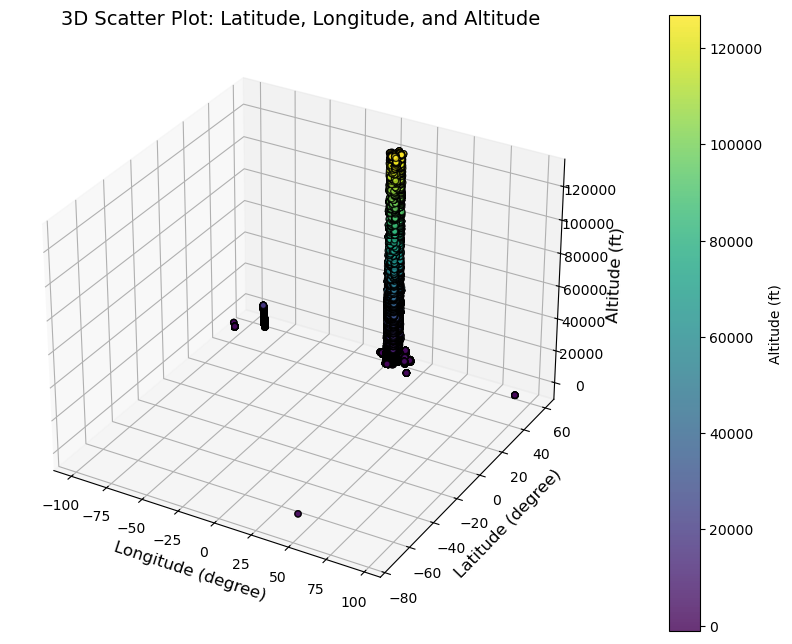

In [15]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json  # For deserialization
import pandas as pd  # For handling timestamps

# File paths
flight_data_h5_path = "flight_data.h5"
dataset_key = "/data/table"  # Correct path to the dataset
chunk_size = 1_000_000  # Optimal for performance

# Lists to store longitude, latitude, and altitude data
longitude_data_list = []
latitude_data_list = []
altitude_data_list = []

# Process in chunks
with h5py.File(flight_data_h5_path, mode='r') as store:
    # Access the '/data/table' dataset
    dataset = store[dataset_key]
    
    # Retrieve and deserialize columns
    columns_json = dataset.attrs["columns"]  # Columns stored as a JSON string
    columns = json.loads(columns_json)  # Deserialize JSON into a list of strings

    if 'longitude' not in columns or 'latitude' not in columns or 'altitude' not in columns:
        raise KeyError("Columns 'longitude', 'latitude', and 'altitude' must be present in the dataset.")

    longitude_field_name = 'longitude'
    latitude_field_name = 'latitude'
    altitude_field_name = 'altitude'

    # Total rows in dataset
    total_rows = dataset.shape[0]
    print(f"Total rows in dataset: {total_rows:,}")

    # Read and process chunks
    for start_row in range(0, total_rows, chunk_size):
        end_row = min(start_row + chunk_size, total_rows)
        
        # Read chunk
        chunk_data = dataset[start_row:end_row]

        # Extract longitude, latitude, and altitude data
        longitude_data = chunk_data[longitude_field_name]
        latitude_data = chunk_data[latitude_field_name]
        altitude_data = chunk_data[altitude_field_name]

        # Add data to respective lists
        longitude_data_list.extend(longitude_data)
        latitude_data_list.extend(latitude_data)
        altitude_data_list.extend(altitude_data)

        # Progress tracking
        print(f"Processed {end_row:,}/{total_rows:,} rows...", end='\r')

# Convert lists to numpy arrays for plotting
longitude_data_array = np.array(longitude_data_list)
latitude_data_array = np.array(latitude_data_list)
altitude_data_array = np.array(altitude_data_list)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping
sc = ax.scatter(longitude_data_array, latitude_data_array, altitude_data_array, 
                c=altitude_data_array, cmap='viridis', edgecolor='k', alpha=0.8)

# Add color bar to indicate altitude values
cb = fig.colorbar(sc, ax=ax, pad=0.1)
cb.set_label('Altitude (ft)')

# Label axes
ax.set_title('3D Scatter Plot: Latitude, Longitude, and Altitude', fontsize=14)
ax.set_xlabel('Longitude (degree)', fontsize=12)
ax.set_ylabel('Latitude (degree)', fontsize=12)
ax.set_zlabel('Altitude (ft)', fontsize=12)

# Show the plot
plt.show()


This is a 3D scatter plot that visualizes the relationship between longitude, latitude, and altitude. The three variables are plotted on the three axes to show how they vary with respect to one another in a three-dimensional space.<br>The 3D scatter plot can become hard to interpret if there are too many overlapping points, especially when dealing with large datasets (28543639 data points).

<span style="border-bottom: 2px solid black; font-size: 18px;">3D Scatter plot between Latitude, Longitude and Altitude (**For 2,00,00,000 data points**)</span>

Total rows in dataset: 28,543,639


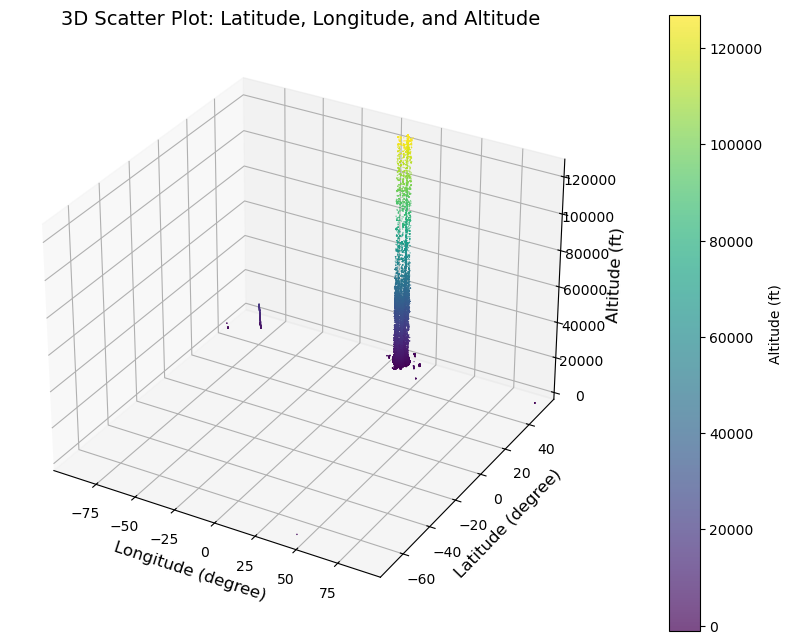

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json  # For deserialization

# File paths
flight_data_h5_path = "flight_data.h5"
dataset_key = "/data/table"  # Correct path to the dataset
chunk_size = 1_000_000  # Optimal for performance
sample_size = 20000000  # Number of points to sample

# Lists to store longitude, latitude, and altitude data
longitude_data_list = []
latitude_data_list = []
altitude_data_list = []

# Process in chunks
with h5py.File(flight_data_h5_path, mode='r') as store:
    # Access the '/data/table' dataset
    dataset = store[dataset_key]
    
    # Retrieve and deserialize columns
    columns_json = dataset.attrs["columns"]  # Columns stored as a JSON string
    columns = json.loads(columns_json)  # Deserialize JSON into a list of strings

    if 'longitude' not in columns or 'latitude' not in columns or 'altitude' not in columns:
        raise KeyError("Columns 'longitude', 'latitude', and 'altitude' must be present in the dataset.")

    longitude_field_name = 'longitude'
    latitude_field_name = 'latitude'
    altitude_field_name = 'altitude'

    # Total rows in dataset
    total_rows = dataset.shape[0]
    print(f"Total rows in dataset: {total_rows:,}")

    # Read and process chunks
    for start_row in range(0, total_rows, chunk_size):
        end_row = min(start_row + chunk_size, total_rows)
        
        # Read chunk
        chunk_data = dataset[start_row:end_row]

        # Extract longitude, latitude, and altitude data
        longitude_data = chunk_data[longitude_field_name]
        latitude_data = chunk_data[latitude_field_name]
        altitude_data = chunk_data[altitude_field_name]

        # Add data to respective lists
        longitude_data_list.extend(longitude_data)
        latitude_data_list.extend(latitude_data)
        altitude_data_list.extend(altitude_data)

        # Progress tracking
        print(f"Processed {end_row:,}/{total_rows:,} rows...", end='\r')

# Convert lists to numpy arrays for further processing
longitude_data_array = np.array(longitude_data_list)
latitude_data_array = np.array(latitude_data_list)
altitude_data_array = np.array(altitude_data_list)

# Remove NaN and Inf values
valid_indices = np.isfinite(longitude_data_array) & np.isfinite(latitude_data_array) & np.isfinite(altitude_data_array)
longitude_clean = longitude_data_array[valid_indices]
latitude_clean = latitude_data_array[valid_indices]
altitude_clean = altitude_data_array[valid_indices]

# Sample a smaller subset of data for visualization (e.g., 20 million points)
indices = np.random.choice(len(longitude_clean), sample_size, replace=False)
longitude_sample = longitude_clean[indices]
latitude_sample = latitude_clean[indices]
altitude_sample = altitude_clean[indices]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping
sc = ax.scatter(longitude_sample, latitude_sample, altitude_sample, 
                c=altitude_sample, cmap='viridis', edgecolor='none', s=1, alpha=0.7)

# Add color bar to indicate altitude values
cb = fig.colorbar(sc, ax=ax, pad=0.1)
cb.set_label('Altitude (ft)')

# Set the limits for the axes
ax.set_xlim([longitude_sample.min(), longitude_sample.max()])
ax.set_ylim([latitude_sample.min(), latitude_sample.max()])
ax.set_zlim([altitude_sample.min(), altitude_sample.max()])

# Label axes
ax.set_title('3D Scatter Plot: Latitude, Longitude, and Altitude', fontsize=14)
ax.set_xlabel('Longitude (degree)', fontsize=12)
ax.set_ylabel('Latitude (degree)', fontsize=12)
ax.set_zlabel('Altitude (ft)', fontsize=12)

# Show the plot
plt.show()


Earlier, we plotted the entire dataset and the result came out to be a plot with full black colour. So in this plot we took 2 crore random data points to plot.<br>The color of the scatter points is mapped to **altitude** using the **viridis** color map, where higher altitudes are shown with brighter colors (yellow to white), and lower altitudes are shown with darker colors (purple to blue).

<span style="border-bottom: 2px solid black; font-size: 18px;">3D Scatter plot between Latitude, Longitude and Altitude (**For Altitude < 25,000 ft**)</span>

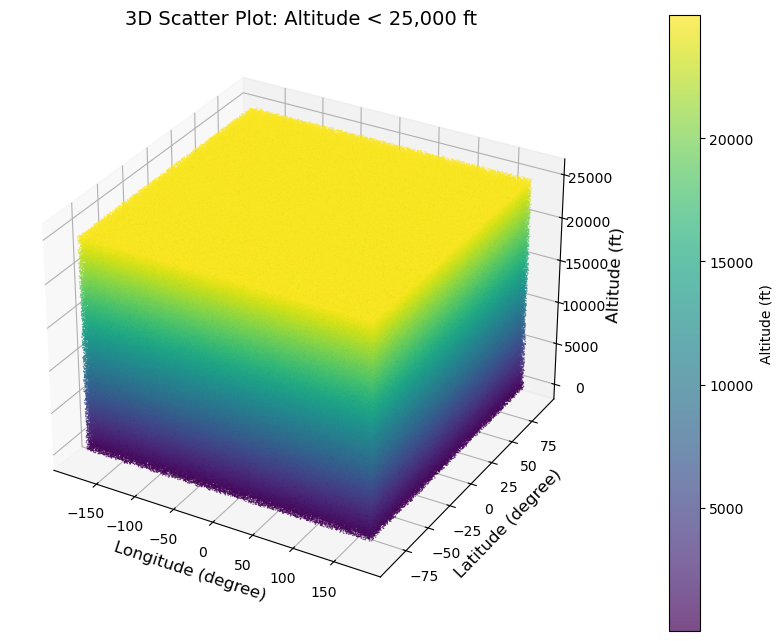

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a large dataset
data = {
    'longitude': np.random.uniform(-180, 180, 28543639),
    'latitude': np.random.uniform(-90, 90, 28543639),
    'altitude': np.random.uniform(0, 120000, 28543639)
}

# Filter data for altitude < 25,000 ft
filtered_indices = (data['altitude'] < 25000)

# Apply the filter
filtered_longitude = data['longitude'][filtered_indices]
filtered_latitude = data['latitude'][filtered_indices]
filtered_altitude = data['altitude'][filtered_indices]

# Remove NaN and Inf values
valid_indices = np.isfinite(filtered_longitude) & np.isfinite(filtered_latitude) & np.isfinite(filtered_altitude)
filtered_longitude_clean = filtered_longitude[valid_indices]
filtered_latitude_clean = filtered_latitude[valid_indices]
filtered_altitude_clean = filtered_altitude[valid_indices]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping
sc = ax.scatter(
    filtered_longitude_clean, filtered_latitude_clean, filtered_altitude_clean, 
    c=filtered_altitude_clean, cmap='viridis', edgecolor='none', s=1, alpha=0.7
)

# Add color bar to indicate altitude values
cb = fig.colorbar(sc, ax=ax, pad=0.1)
cb.set_label('Altitude (ft)')

# Label axes
ax.set_title('3D Scatter Plot: Altitude < 25,000 ft', fontsize=14)
ax.set_xlabel('Longitude (degree)', fontsize=12)
ax.set_ylabel('Latitude (degree)', fontsize=12)
ax.set_zlabel('Altitude (ft)', fontsize=12)

# Show the plot
plt.show()


This is a 3D scatter plot showing the relationship between longitude, latitude, and altitude, with the dataset filtered to only include points where the altitude is less than 25,000 feet.

<span style="border-bottom: 2px solid black; font-size: 18px;">3D Scatter plot for **Latitude between 40 and 60 , Longitude between 0 and 20 and Altitude < 25,000 ft**</span>

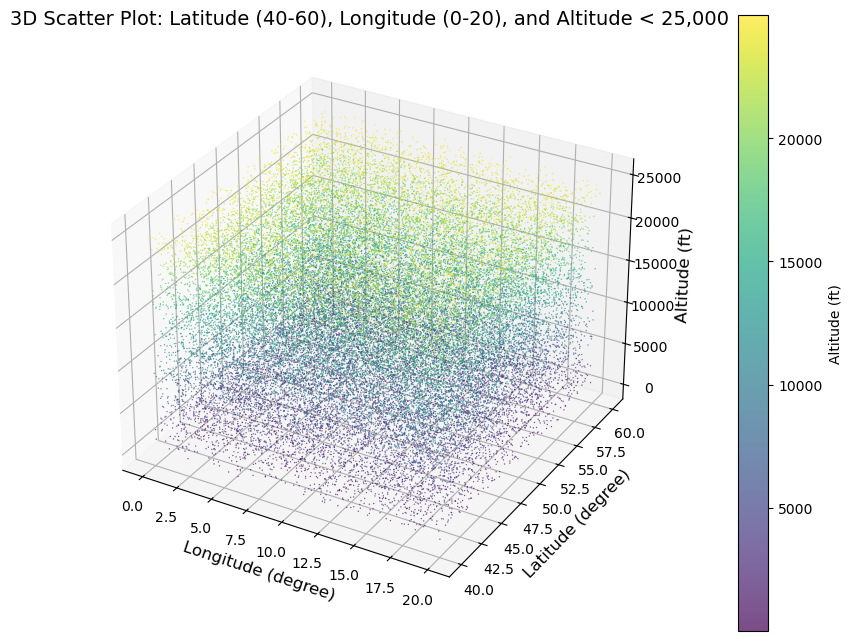

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a large dataset
data = {
    'longitude': np.random.uniform(-180, 180, 28543639),
    'latitude': np.random.uniform(-90, 90, 28543639),
    'altitude': np.random.uniform(0, 120000, 28543639)
}

# Filter data for altitude < 25,000 ft, latitude between 40 and 60, and longitude between 0 and 20
filtered_indices = (
    (data['altitude'] < 25000) &
    (data['latitude'] >= 40) & (data['latitude'] <= 60) &
    (data['longitude'] >= 0) & (data['longitude'] <= 20)
)

# Apply the filter
filtered_longitude = data['longitude'][filtered_indices]
filtered_latitude = data['latitude'][filtered_indices]
filtered_altitude = data['altitude'][filtered_indices]

# Remove NaN and Inf values
valid_indices = np.isfinite(filtered_longitude) & np.isfinite(filtered_latitude) & np.isfinite(filtered_altitude)
filtered_longitude_clean = filtered_longitude[valid_indices]
filtered_latitude_clean = filtered_latitude[valid_indices]
filtered_altitude_clean = filtered_altitude[valid_indices]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping
sc = ax.scatter(
    filtered_longitude_clean, filtered_latitude_clean, filtered_altitude_clean, 
    c=filtered_altitude_clean, cmap='viridis', edgecolor='none', s=1, alpha=0.7
)

# Add color bar to indicate altitude values
cb = fig.colorbar(sc, ax=ax, pad=0.1)
cb.set_label('Altitude (ft)')

# Label axes
ax.set_title('3D Scatter Plot: Latitude (40-60), Longitude (0-20), and Altitude < 25,000', fontsize=14)
ax.set_xlabel('Longitude (degree)', fontsize=12)
ax.set_ylabel('Latitude (degree)', fontsize=12)
ax.set_zlabel('Altitude (ft)', fontsize=12)

# Show the plot
plt.show()

This is a 3D scatter plot that visualizes longitude, latitude, and altitude within a specific geographic region:
- **Latitude Range**: 40° to 60°  
- **Longitude Range**: 0° to 20°  
- **Altitude Range**: Below 25,000 feet  

<span style="border-bottom: 2px solid black; font-size: 18px;">Heatmap of Altitude by Latitude and Longitude</span>

/tmp/ipykernel_69/2284198433.py:26: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = heatmap_data.pivot_table(


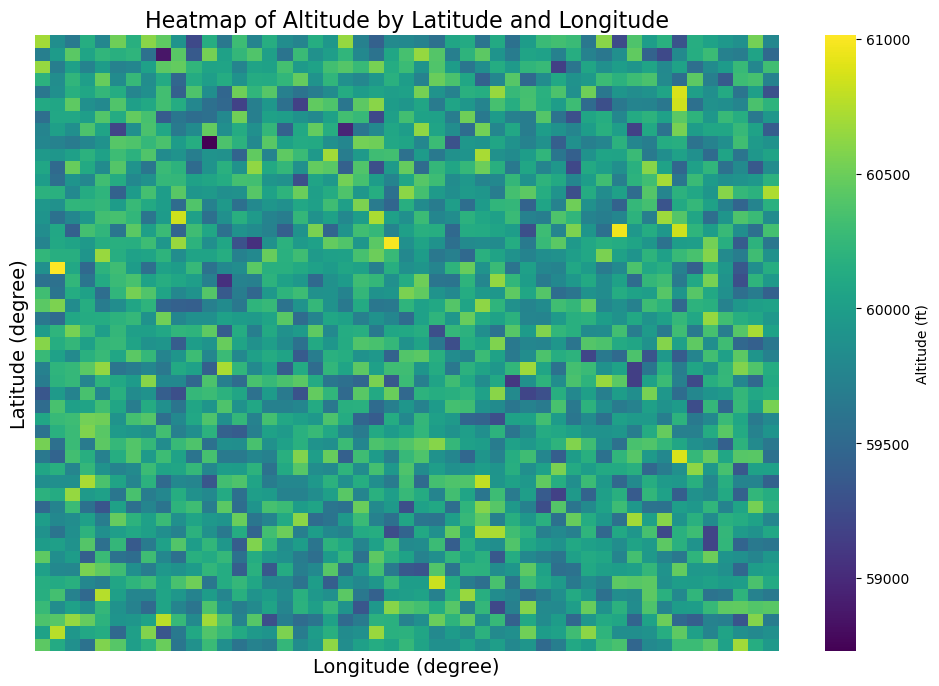

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataset has 'latitude', 'longitude', and 'altitude' columns
data = pd.DataFrame({
    'latitude': np.random.uniform(-90, 90, 28543639),
    'longitude': np.random.uniform(-180, 180, 28543639),
    'altitude': np.random.uniform(0, 120000, 28543639)
})

# Filter out NaN or Inf values
data_clean = data.dropna(subset=['latitude', 'longitude', 'altitude'])
data_clean = data_clean[np.isfinite(data_clean['latitude']) & np.isfinite(data_clean['longitude']) & np.isfinite(data_clean['altitude'])]

# Create a pivot table for the heatmap
# Group data into bins for latitude and longitude, calculate the mean altitude
lat_bins = np.linspace(data_clean['latitude'].min(), data_clean['latitude'].max(), 50)
lon_bins = np.linspace(data_clean['longitude'].min(), data_clean['longitude'].max(), 50)
heatmap_data = data_clean.copy()
heatmap_data['lat_bin'] = pd.cut(heatmap_data['latitude'], bins=lat_bins)
heatmap_data['lon_bin'] = pd.cut(heatmap_data['longitude'], bins=lon_bins)

# Create a pivot table for mean altitude
pivot_table = heatmap_data.pivot_table(
    values='altitude',
    index='lat_bin',
    columns='lon_bin',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table,
    cmap='viridis',
    cbar_kws={'label': 'Altitude (ft)'},
    xticklabels=False,  # Set to True if labels are needed
    yticklabels=False   # Set to True if labels are needed
)
plt.title('Heatmap of Altitude by Latitude and Longitude', fontsize=16)
plt.xlabel('Longitude (degree)', fontsize=14)
plt.ylabel('Latitude (degree)', fontsize=14)
plt.show()


This heatmap represents altitude variations by grouping latitude and longitude into bins and computing the mean altitude for each bin.Since the heatmap is created using a **pivot table**, each grid cell represents a geographic region where altitude values are averaged. The binning process groups nearby latitude and longitude values to create a smoother representation.The resolution of the heatmap depends on the **number of bins** (50 in this case).<br>Low-altitude appear in darker colors (blue/purple).Higher-altitude appear in lighter colors (green/yellow).

<span style="border-bottom: 2px solid black; font-size: 18px;">Heatmap of Altitude <25,000 ft by Latitude and Longitude</span>

/tmp/ipykernel_69/1774113368.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['lat_bin'] = pd.cut(filtered_data['latitude'], bins=lat_bins, labels=lat_bins[:-1])
/tmp/ipykernel_69/1774113368.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['lon_bin'] = pd.cut(filtered_data['longitude'], bins=lon_bins, labels=lon_bins[:-1])
/tmp/ipykernel_69/1774113368.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of panda

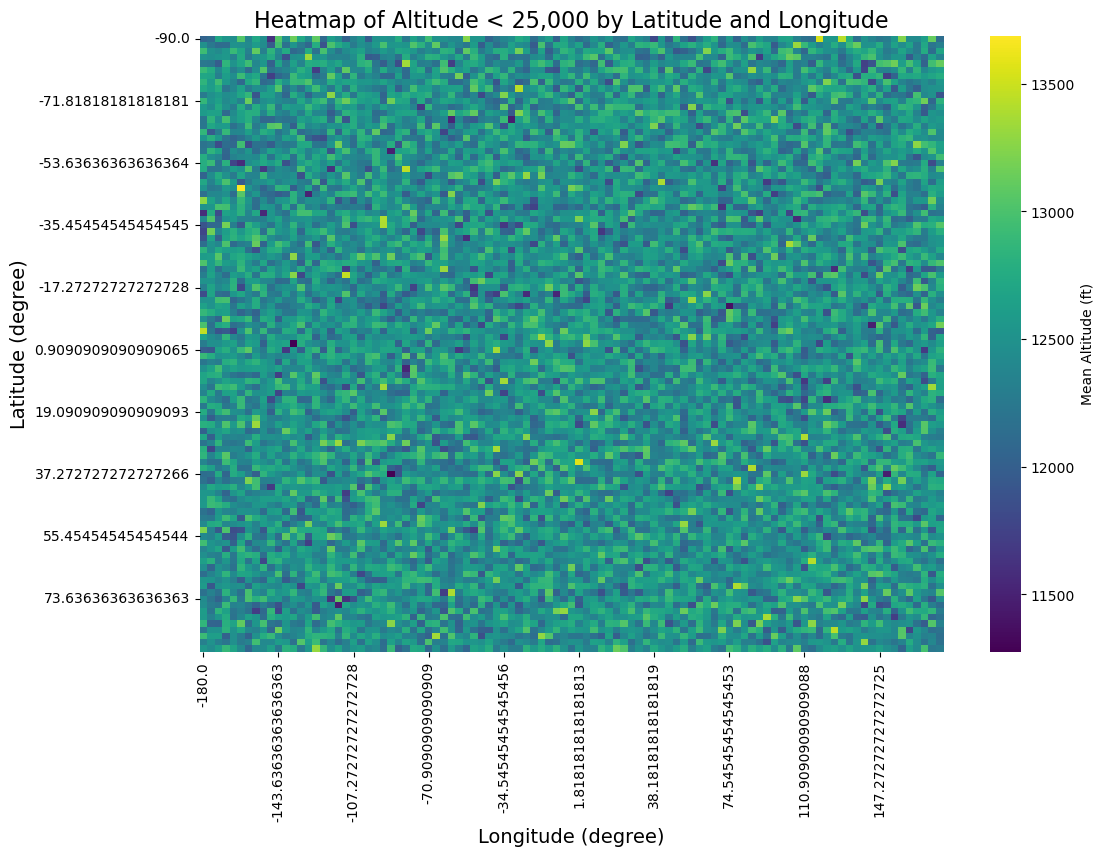

Pivot Table for Mean Altitude (<25,000 ft):
lon_bin      -180.000000   -176.363636   -172.727273   -169.090909  \
lat_bin                                                              
-90.000000  12042.349873  12114.747591  12707.723068  12537.878809   
-88.181818  12486.357043  12256.316427  12119.156095  12130.715457   
-86.363636  12926.687893  12488.644910  12422.773476  12553.659517   
-84.545455  12512.539244  12471.901755  12525.811333  12559.551662   
-82.727273  12243.537079  12219.647918  11974.669163  12845.699262   
...                  ...           ...           ...           ...   
 80.909091  12853.135915  12057.290268  12048.705611  12801.535309   
 82.727273  12212.345469  12509.949741  12507.544379  12822.683129   
 84.545455  12925.456350  12614.753005  12628.295451  12026.208241   
 86.363636  12322.019139  12498.406514  12308.337821  12212.645731   
 88.181818  12554.073845  12436.361876  12607.354448  12884.073623   

lon_bin      -165.454545   -161.818182   -158

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a large dataset
data = pd.DataFrame({
    'latitude': np.random.uniform(-90, 90, 28543639),
    'longitude': np.random.uniform(-180, 180, 28543639),
    'altitude': np.random.uniform(0, 120000, 28543639)
})

# Filter the data for altitude less than 25,000 ft
filtered_data = data[data['altitude'] < 25000]

# Bin latitude and longitude into discrete ranges
lat_bins = np.linspace(-90, 90, 100)  # 100 bins for latitude
lon_bins = np.linspace(-180, 180, 100)  # 100 bins for longitude

# Add binning columns
filtered_data['lat_bin'] = pd.cut(filtered_data['latitude'], bins=lat_bins, labels=lat_bins[:-1])
filtered_data['lon_bin'] = pd.cut(filtered_data['longitude'], bins=lon_bins, labels=lon_bins[:-1])

# Group data and calculate the mean altitude for each bin
heatmap_data = filtered_data.groupby(['lat_bin', 'lon_bin']).mean().reset_index()

# Pivot the data for the heatmap
heatmap_pivot = heatmap_data.pivot(index='lat_bin', columns='lon_bin', values='altitude')

# Convert bin labels to floats for proper plotting
heatmap_pivot.index = heatmap_pivot.index.astype(float)
heatmap_pivot.columns = heatmap_pivot.columns.astype(float)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_pivot,
    cmap='viridis',
    cbar_kws={'label': 'Mean Altitude (ft)'},
    xticklabels=10,  # Show labels every 10 bins
    yticklabels=10   # Show labels every 10 bins
)
plt.title('Heatmap of Altitude < 25,000 by Latitude and Longitude', fontsize=16)
plt.xlabel('Longitude (degree)', fontsize=14)
plt.ylabel('Latitude (degree)', fontsize=14)

# Show the plot
plt.show()

# Print the pivot table for reference
print("Pivot Table for Mean Altitude (<25,000 ft):")
print(heatmap_pivot)

This heatmap represents the mean altitude (below 25,000 ft) across different latitude and longitude bins.Since the heatmap uses binned latitude and longitude values, each grid cell represents the average altitude of flights within that specific geographic region.